# Resultaten
In dit notebook staan de resulaten van het optellen van meerdere arrays met verschillende hoeveelheden threads.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Tijden1 = [0.000047,0.000326,0.004237,0.027813]
Tijden2 = [0.000157,0.000294,0.003530,0.026036]
Tijden4 = [0.000515,0.000351,0.002425,0.026214] 
Tijden8 = [0.000175,0.000396,0.002584,0.024395]
Lengte = ['10k','100k','1m','10m']

In [3]:
def grafiek():
    plt.plot(Lengte, Tijden8, label = "8 Threads")
    plt.plot(Lengte, Tijden4, label = "4 Threads")
    plt.plot(Lengte, Tijden2, label = "2 Threads")
    plt.plot(Lengte, Tijden1, label = "1 Thread")
    plt.xlabel('Lengte lijst')
    plt.ylabel('Duur in seconden')
    plt.title('tijdsduur met verschillende hoeveelheden threads')
    plt.legend()

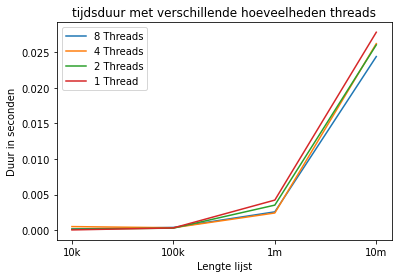

In [4]:
grafiek()

### Conclusie tijden
Je ziet in de grafiek dat er niet een 'groot' verschil is tussen de tijden. dat heeft misschien wel te maken met dat het ook even duurt voordat de threads aangemaakt zijn. Daarom is 8 threads niet het snelste op de kleinere lijsten en wel op die van 10 miljoen. Naarmate de lijsten nog groter worden is het handig om meerdere threads te gaan gebruiken, maar met deze grotes is het niet nodig.

### Aangepaste code 
DEZE CODE IS OVERGETYPT VAN MIJN VIRTUAL MACHINE OMDAT IK HET NIET KON COPY PASTEN, DAAROM IS ER MISSCHIEN EEN KANS DAT ER EEN TYP FOUT IN ZIT. ALS DAT HET GEVAL IS VERBETER DAN AUB DE FOUT EN RUN HET OPNIEUW

compile met 'gcc -fopenmp arraySum.c -o arraySum

In [5]:
"""
/* arraySum.c uses an array to sum the values in an input file,
 *  whose name is specified on the command-line.
 * Huib Aldewereld, HU, HPP, 2020
 */

#include <stdio.h>      /* I/O stuff */
#include <stdlib.h>     /* calloc, etc. */
#include <omp.h>

void readArray(char * fileName, double ** a, int * n);
double sumArray(double * a, int numValues) ;

int main(int argc, char * argv[])
{
  int  howMany;
  double sum;
  double * a;
  double start;
  double end;

  if (argc != 2) {
    fprintf(stderr, "\n*** Usage: arraySum <inputFile>\n\n");
    exit(1);
  }
  
#pragma omp master
  
  readArray(argv[1], &a, &howMany);
  
  start = omp_get_wtime();
  sum = sumArray(a, howMany);
  end = omp_get_wtime();
  printf("elapsed time = %f sec\n", end - start);
  
  printf("The sum of the values in the input file '%s' is %g\n",
           argv[1], sum);

  free(a);

  return 0;
}

/* readArray fills an array with values from a file.
 * Receive: fileName, a char*,
 *          a, the address of a pointer to an array,
 *          n, the address of an int.
 * PRE: fileName contains N, followed by N double values.
 * POST: a points to a dynamically allocated array
 *        containing the N values from fileName
 *        and n == N.
 */

void readArray(char * fileName, double ** a, int * n) {
  int count, howMany;
  double * tempA;
  FILE * fin;

  fin = fopen(fileName, "r");
  if (fin == NULL) {
    fprintf(stderr, "\n*** Unable to open input file '%s'\n\n",
                     fileName);
    exit(1);
  }

  fscanf(fin, "%d", &howMany);
  tempA = calloc(howMany, sizeof(double));
  if (tempA == NULL) {
    fprintf(stderr, "\n*** Unable to allocate %d-length array",
                     howMany);
    exit(1);
  }

  for (count = 0; count < howMany; count++)
   fscanf(fin, "%lf", &tempA[count]);

  fclose(fin);

  *n = howMany;
  *a = tempA;
}

/* sumArray sums the values in an array of doubles.
 * Receive: a, a pointer to the head of an array;
 *          numValues, the number of values in the array.
 * Return: the sum of the values in the array.
 */

double sumArray(double * a, int numValues) {
  int i;
  double result = 0.0;
  omp_set_num_threads(8); // hoeveel threads het gebruikt
#pragma omp parallel for private(i) reduction(+:result)
  for (i = 0; i < numValues; i++) {
    result += a[i];
  }

  return result;
}
"""

'\n/* arraySum.c uses an array to sum the values in an input file,\n *  whose name is specified on the command-line.\n * Huib Aldewereld, HU, HPP, 2020\n */\n\n#include <stdio.h>      /* I/O stuff */\n#include <stdlib.h>     /* calloc, etc. */\n#include <omp.h>\n\nvoid readArray(char * fileName, double ** a, int * n);\ndouble sumArray(double * a, int numValues) ;\n\nint main(int argc, char * argv[])\n{\n  int  howMany;\n  double sum;\n  double * a;\n  double start;\n  double end;\n\n  if (argc != 2) {\n    fprintf(stderr, "\n*** Usage: arraySum <inputFile>\n\n");\n    exit(1);\n  }\n  \n  #pragma omp master\n  \n  readArray(argv[1], &a, &howMany);\n  \n  start = omp_get_wtime();\n  sum = sumArray(a, howMany);\n  end = omp_get_wtime();\n  printf("elapsed time = %f sec\n", end - start);\n  \n  printf("The sum of the values in the input file \'%s\' is %g\n",\n           argv[1], sum);\n\n  free(a);\n\n  return 0;\n}\n\n/* readArray fills an array with values from a file.\n * Receive: file

In [6]:
Threads_1 = {'Lijst': ['10k','100k','1m','10m'],
        'Duur': Tijden1,
        }

Threads_1 = pd.DataFrame(Threads_1, columns = ['Lijst', 'Duur'])

print(Threads_1)

  Lijst      Duur
0   10k  0.000047
1  100k  0.000326
2    1m  0.004237
3   10m  0.027813


In [7]:
Threads_2 = {'Lijst': ['10k','100k','1m','10m'],
        'Duur': Tijden2,
        }

Threads_2 = pd.DataFrame(Threads_2, columns = ['Lijst', 'Duur'])

print(Threads_2)

  Lijst      Duur
0   10k  0.000157
1  100k  0.000294
2    1m  0.003530
3   10m  0.026036


In [8]:
Threads_4 = {'Lijst': ['10k','100k','1m','10m'],
        'Duur': Tijden4,
        }

Threads_4 = pd.DataFrame(Threads_4, columns = ['Lijst', 'Duur'])

print(Threads_4)

  Lijst      Duur
0   10k  0.000515
1  100k  0.000351
2    1m  0.002425
3   10m  0.026214


In [9]:
Threads_8 = {'Lijst': ['10k','100k','1m','10m'],
        'Duur': Tijden8,
        }

Threads_8 = pd.DataFrame(Threads_8, columns = ['Lijst', 'Duur'])

print(Threads_8)

  Lijst      Duur
0   10k  0.000175
1  100k  0.000396
2    1m  0.002584
3   10m  0.024395
